# Chapter 5: Integrals and Derivatives

In [8]:
#Importing packages
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

## 5.1 Fundamental Methods for Evaluating Integrals

### 1. Trapezoidal rule
Suppose we have a function $ f(x)$ and we want to caluculate its integral with respect to x from x = a to x = b, which we denote $I(a,b)$:
$$ I(a,b) = \int_a^b f(x) \, dx $$

Suppose we divide the interval from a to b into N slices or steps, so that each slice has width $ h = \frac{(b-a)}{N} $. Then the right-hand side of the kth slice at a + hk, and the left hand side falls at a + h(k -1). Thus the area of the trapezoid for this slice is 

$$ A_k = \frac{1}{2} [f(a + (k -1)h) + f(a+kh)] $$
This is the Trapezoidal rule. It gives us a trapezoidal approximation to the area under one slice of our function. 
Now our approximation for the area under the whole curve is the sum of the areas of the trapezoids for all N slices:

$$ I(a, b) \approx \sum_{k =1}^{N} A_k = \frac{1}{2}h \sum_{k -1}^{N}[f(a + (k -1)h) + f(a+kh)] \\
                                       = h[\frac{1}{2} f(a) + f(a+h) + f(a+2h) + ..... + \frac{1}{2}f(b)] \\
                                       = h[\frac{1}{2} f(a) + \frac{1}{2}f(b) + \sum_{k = 1}^{N-1} f(a + kh)]$$

[np.float64(inf), np.float64(102.4218181818182), np.float64(100.6059090909091), np.float64(100.26933034044143), np.float64(100.15150568181821), np.float64(100.09696581818181), np.float64(100.06733819678261), np.float64(100.04947332550829), np.float64(100.03787819602275), np.float64(100.02992854932498), np.float64(100.02424218181818), np.float64(100.02003489577831), np.float64(100.01683489992517), np.float64(100.0143445448498), np.float64(100.01236852069215), np.float64(100.01077436288817), np.float64(100.00946965997872), np.float64(100.00838835306524), np.float64(100.00748220661117), np.float64(100.00671533437364), np.float64(100.00606059090909), np.float64(100.00549713588913), np.float64(100.00500875499066), np.float64(100.00458268022976), np.float64(100.00420874690188), np.float64(100.0038787816727), np.float64(100.00358615212737), np.float64(100.00332543086255), np.float64(100.00309214200523), np.float64(100.00288256782606), np.float64(100.00269359970075), np.float64(100.00252262216

/var/folders/zl/fqyfw3z95bjccqn0m2sm7qhw0000gn/T/ipykernel_10511/578895989.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  h = (b - a)/N


(0.0, 1000.0)

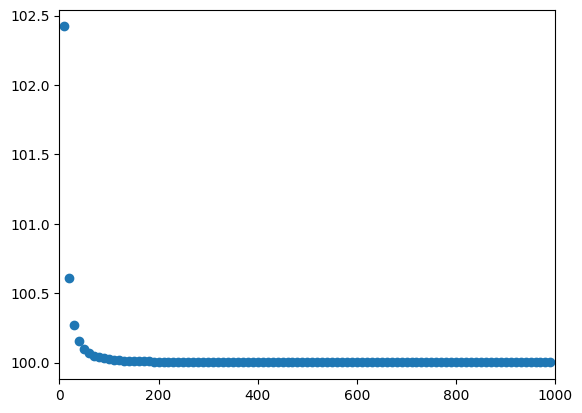

In [38]:
def ext_trapezoidal_continous(function, N, a, b):
    h = (b - a)/N
    f_a = function(a)
    f_b = function(b)

    sum = 0.5 * f_a + 0.5 *f_b
    for k in range(1, N):
        sum += function(a + k*h)
    return h* sum

def f(x):
    return x**4 - 2*x + 1

#ext_trapezoidal_rule(f,100, 0, 2)

N = np.arange(0, 1000,10)
rel_error = []
for n in N:
    rel_error.append((ext_trapezoidal_continous(f,n, 0, 2)/4.4)* 100)
print(rel_error)
plt.scatter(N, rel_error)
plt.xlim(0, 1000)

## Exercise 5.1

In [39]:
def ext_trapezoidal_discrete(y, x, direction = False):
    h = x[1] - x[0]
    AUC = np.zeros(len(x))
    if direction: #i.e direction matters. 
        for k in range(1, len(x)):
            trapezoid_area = h * 0.5 * (y[k-1 ] + y[k])
            AUC[k] = AUC[k -1] + trapezoid_area
    else:
        y = abs(y)
        for k in range(1, len(x)):
            trapezoid_area = h * 0.5 * (y[k-1 ] + y[k])
            AUC[k] = AUC[k -1] + trapezoid_area
    return np.array(AUC)



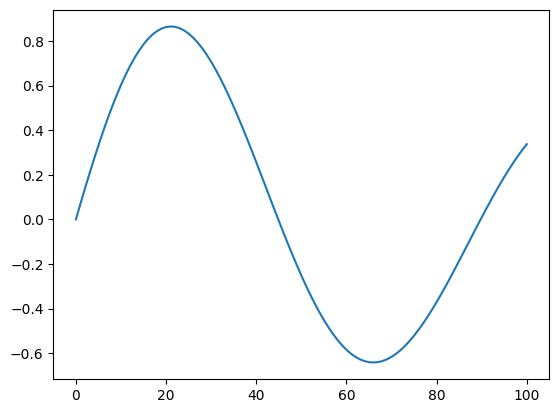

In [28]:
data = np.loadtxt('velocities.txt', float)
time = data[:,0]
v_x = data[:,1] # ms^-1
#trapezoidal rule
h = time[1] - time[0]
f_a = v_x[0]
f_b = v_x[1]

plt.plot(time, v_x)

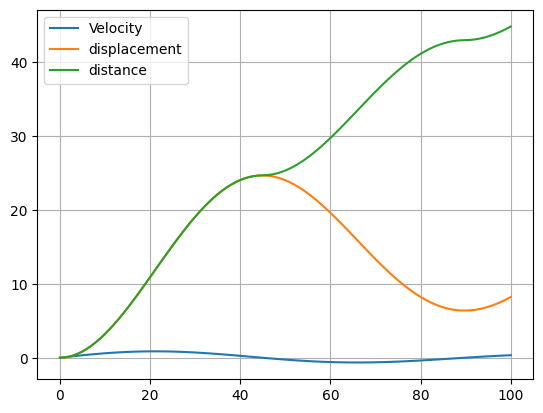

In [42]:
dispalcement = ext_trapezoidal_discrete(v_x, time, direction = True)
distance = ext_trapezoidal_discrete(v_x, time, direction = False)
plt.plot(time, v_x, label = 'Velocity') #velocity
plt.plot(time, dispalcement, label = 'displacement') #displacement
plt.plot(time, distance, label = 'distance')
plt.legend()
plt.grid(True)


## 5.1.2 Simpson's Rule

$$ I(a,b) \approx \frac{1}{3}h[f(a) + f(b) + 4\sum_{k}^{N/2} f(a + (2k - 1)h) + 2\sum_{k}^{N/2 - 1}f(a + 2kh)] $$

In [149]:
def simpsons_continous(function, N, a, b):
    h = (b - a)/N
    f_a = function(a)
    f_b = function(b)
    sum = f_a + f_b
    for k in range(1, N):
        if k%2 == 0: #even
            sum += 2* function(a + (k)*h)
        else: #odd
            sum += 4*function(a + k*h) 
    final_sum = (h/3)*sum
    return final_sum

In [151]:
x = np.linspace(0,1, 10)
print(x)
x[1::2]

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


array([0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ])

In [152]:
simpsons_continous(f, 100, 0, 2) 

4.400000042666667

## Exercise 5.3

Consider the integral $$ E(x) = \int_{0}^{x} e^{-t^{2}}\,dt $$

THis is the erf (error) function missing a (2/sqrt(pi)) coefficient

In [164]:
#a) 
def integrand(t):
    return np.exp(-t**2)

def unscaled_erf_function(x):
    a = 0
    #print(N)
    E_xs = simpsons_continous(integrand, 10000, a, x)
    E_xt = ext_trapezoidal_continous(integrand, 1000, a, x)
    return E_xs
print(unscaled_erf_function(1.0)) # == 0.200

0.7468241328124275


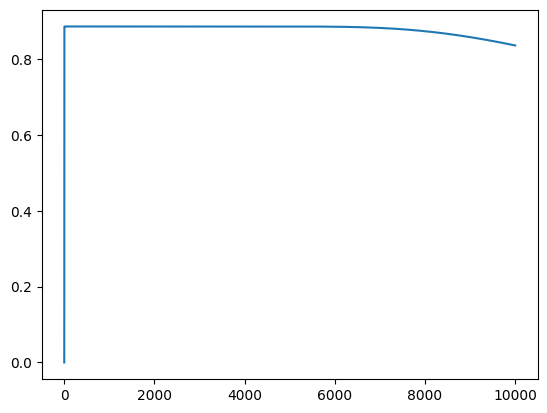

In [165]:
x = np.arange(0, 10000) # the integration breaks down when the spacing or slices is much smaller than the width, it overshoots
y = unscaled_erf_function(x)
plt.plot(x, y, label = 'erf(x)')

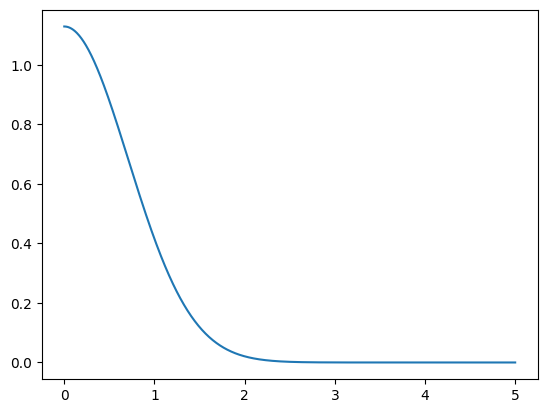

In [87]:
x = np.linspace(0, 5, 1000)
y = integrand(x)
plt.plot(x, y)

In [83]:
integrand(0)

np.float64(1.1283791670955126)

In [84]:
integrand(100000)

np.float64(0.0)

## Exercise 5.4 The diffraction limit of a telescope

When light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction patter consisteing of central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by 
$$ I(r) = (\frac{J_1(kr)}{kr})^{2} $$
 where r is the distance in the focal plane from the center of the diffraction pattern,
 $ k = 2 \pi/\lambda$ and $ J_1(x) $ is a bessel function. The Bessel fucntions are given by:
$$ J_m(x) = \frac{1}{\pi} \int_{0}^{\pi} cos(m\theta - xsin\theta) \,d\theta $$ 
where m is a nonnegative integer and x >= 0

In [173]:

def J(m,x):
    J_integrand = lambda t: np.cos(m*t - x* np.sin(t))
    a = 0
    b = np.pi
    Integral = (1/np.pi)*simpsons_continous(J_integrand, 1000, a, b)
    Integral2 = (1/np.pi)*ext_trapezoidal_continous(J_integrand, 1000, a, b)
    return Integral


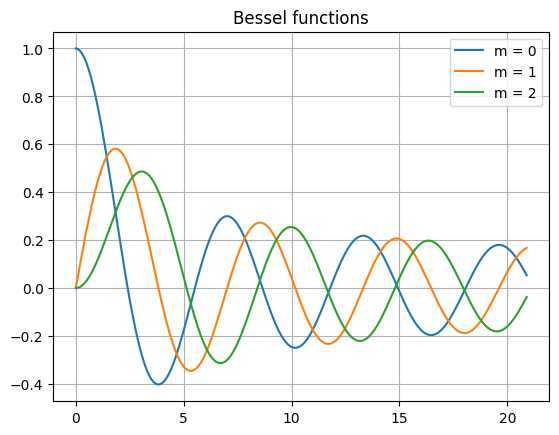

In [176]:
x = np.arange(0, 21, 0.1)
J0 = J(0, x)
J1 = J(1, x)
J2 = J(2, x)

plt.plot(x, J0, label = 'm = 0')
plt.plot(x, J1, label = 'm = 1')
plt.plot(x, J2, label = 'm = 2')
plt.title('Bessel functions')
plt.legend()
plt.grid(True)
plt.show()

2.2309898603351157


In [262]:
def Intensity(KR):
    I_r = (J(1, KR)/KR)**2
    I_r[KR <= 0.05] = 1/4
    return I_r

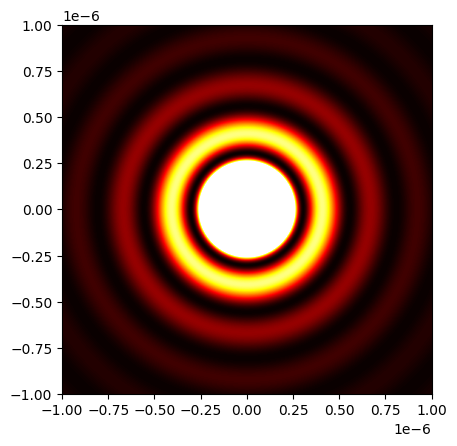

In [274]:
# To plot a density plot of the intensity as per x and y, we can make
wavelength = 500e-9 # in nm
k = 2*np.pi/wavelength #wave no.
x = np.linspace(-1e-6, 1e-6, 500)
y = np.linspace(-1e-6, 1e-6, 500)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
K_R = k * R
I = Intensity(K_R)
plt.imshow(I, extent = (-1e-6, 1e-6, -1e-6, 1e-6), cmap = 'hot', vmax = 0.005)
# plt.xlim(-1e-6, 1e6)
# plt.ylim(-1e-6, 1e6)
#print(K_R)
# density = np.zeros((len(x), len(x)),float)
# for i in range(len(x)):
#     for j in range(len(y)):
#         r = np.sqrt(x[i]**2 + y[i]**2)
#         k_r = k*r
#         if k_r <= 0.01:
#             I_r = 1/4
#             density[i, j] = I_r
#         else:
#             I_r = (J(1, k_r)/(k_r))**2
#         density[i, j] = I_r
# plt.imshow(density, origin = 'lower')

In [275]:
#Let's consider the time taken using loops
x = np.linspace(-1e-6, 1e-6, 500)
y = np.linspace(-1e-6, 1e-6, 500)
density = np.zeros((len(x), len(x)),float)
for i in range(len(x)):
    for j in range(len(y)):
        r = np.sqrt(x[i]**2 + y[i]**2)
        k_r = k*r
        if k_r <= 0.05:
            I_r = 1/4
            density[i, j] = I_r
        else:
            I_r = (J(1, k_r)/(k_r))**2
        density[i, j] = I_r

plt.imshow(density, range = (-1e-6, 1e-6, -1e-6, 1e-6), cmap = 'hot', vmax = 0.005)

KeyboardInterrupt: 

As we see above, loops are functionally useless in largescale matrix multiplications and manipulations. Therefore always use numpy vecotorised methods!

In [208]:
## Trying to understand the numpy meshgrid (Interlude)

x_dum = np.array([1,2,3])
y_dum = np.array([4,5, 6])
X, Y = np.meshgrid(x_dum, y_dum)
print('X_matrix',X)
print('Y_matrix',Y)
R1 = np.sqrt(X**2 + Y**2)
print(R1)

R_2 = np.zeros((3,3), float)
for i in range(len(x_dum)):
    for j in range(len(y_dum)):
        R_2[j,i] = np.sqrt(x_dum[i]**2 + y_dum[j]**2) #why do the indices need to be reversed?
print(R_2)

X_matrix [[1 2 3]
 [1 2 3]
 [1 2 3]]
Y_matrix [[4 4 4]
 [5 5 5]
 [6 6 6]]
[[4.12310563 4.47213595 5.        ]
 [5.09901951 5.38516481 5.83095189]
 [6.08276253 6.32455532 6.70820393]]
[[4.12310563 4.47213595 5.        ]
 [5.09901951 5.38516481 5.83095189]
 [6.08276253 6.32455532 6.70820393]]


In [202]:
R[0, 2]

np.float64(5.0)

[0.49999375 0.49999375 0.49999376 ... 0.49999376 0.49999375 0.49999375]


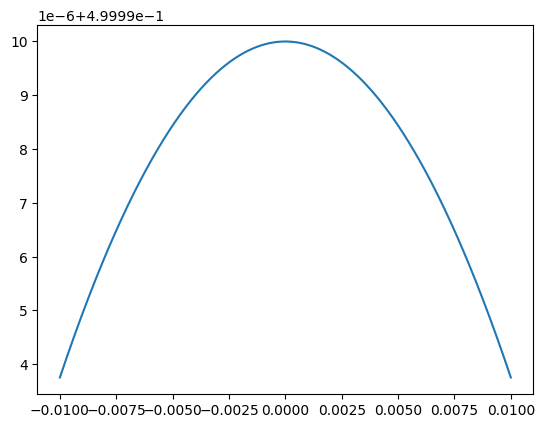

In [192]:
x = np.linspace(-0.01, 0.01, 10000)
y = J(1, x)/x 
print(y)
plt.plot(x, y)

In [261]:
R 

array([[1.41421356e-06, 1.41138231e-06, 1.40855678e-06, ...,
        1.40855678e-06, 1.41138231e-06, 1.41421356e-06],
       [1.41138231e-06, 1.40854537e-06, 1.40571413e-06, ...,
        1.40571413e-06, 1.40854537e-06, 1.41138231e-06],
       [1.40855678e-06, 1.40571413e-06, 1.40287718e-06, ...,
        1.40287718e-06, 1.40571413e-06, 1.40855678e-06],
       ...,
       [1.40855678e-06, 1.40571413e-06, 1.40287718e-06, ...,
        1.40287718e-06, 1.40571413e-06, 1.40855678e-06],
       [1.41138231e-06, 1.40854537e-06, 1.40571413e-06, ...,
        1.40571413e-06, 1.40854537e-06, 1.41138231e-06],
       [1.41421356e-06, 1.41138231e-06, 1.40855678e-06, ...,
        1.40855678e-06, 1.41138231e-06, 1.41421356e-06]])

In [212]:
R1

array([[4.12310563, 4.47213595, 5.        ],
       [5.09901951, 5.38516481, 5.83095189],
       [6.08276253, 6.32455532, 6.70820393]])

In [247]:
result = (J(1, K_R)/K_R)**2
result

array([[1.05388285e-04, 1.03804492e-04, 1.01965832e-04, ...,
        1.01965832e-04, 1.03804492e-04, 1.05388285e-04],
       [1.03804492e-04, 1.01957899e-04, 9.98639054e-05, ...,
        9.98639054e-05, 1.01957899e-04, 1.03804492e-04],
       [1.01965832e-04, 9.98639054e-05, 9.75234579e-05, ...,
        9.75234579e-05, 9.98639054e-05, 1.01965832e-04],
       ...,
       [1.01965832e-04, 9.98639054e-05, 9.75234579e-05, ...,
        9.75234579e-05, 9.98639054e-05, 1.01965832e-04],
       [1.03804492e-04, 1.01957899e-04, 9.98639054e-05, ...,
        9.98639054e-05, 1.01957899e-04, 1.03804492e-04],
       [1.05388285e-04, 1.03804492e-04, 1.01965832e-04, ...,
        1.01965832e-04, 1.03804492e-04, 1.05388285e-04]])

In [254]:
i, j = np.where(result > 0.1)
i,j

(array([213, 213, 213, ..., 286, 286, 286]),
 array([248, 249, 250, ..., 249, 250, 251]))

In [257]:
ij = [(i[m],j[m]) for m in range(len(i))]
print(ij)

[(np.int64(213), np.int64(248)), (np.int64(213), np.int64(249)), (np.int64(213), np.int64(250)), (np.int64(213), np.int64(251)), (np.int64(214), np.int64(241)), (np.int64(214), np.int64(242)), (np.int64(214), np.int64(243)), (np.int64(214), np.int64(244)), (np.int64(214), np.int64(245)), (np.int64(214), np.int64(246)), (np.int64(214), np.int64(247)), (np.int64(214), np.int64(248)), (np.int64(214), np.int64(249)), (np.int64(214), np.int64(250)), (np.int64(214), np.int64(251)), (np.int64(214), np.int64(252)), (np.int64(214), np.int64(253)), (np.int64(214), np.int64(254)), (np.int64(214), np.int64(255)), (np.int64(214), np.int64(256)), (np.int64(214), np.int64(257)), (np.int64(214), np.int64(258)), (np.int64(215), np.int64(238)), (np.int64(215), np.int64(239)), (np.int64(215), np.int64(240)), (np.int64(215), np.int64(241)), (np.int64(215), np.int64(242)), (np.int64(215), np.int64(243)), (np.int64(215), np.int64(244)), (np.int64(215), np.int64(245)), (np.int64(215), np.int64(246)), (np.int

In [277]:
x = np.linspace(0,1,10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [282]:
def adaptive_trapezoidal_rule(function, N0, a, b, e = 1e-6):
    I = [] #placeholder for integrations with different N
    N = N0
    I.append(ext_trapezoidal_continous(function, N, a, b)) #for i = 0
    N = 2*N0
    I.append(ext_trapezoidal_continous(function, N, a,b)) #for i = 1
    err = (1/3)*abs(I[-1] - I[-2]) #error estimation
    #conditional logic starts here
    while err > e:
        N = 2*N
        x = np.linspace(a,b,N)
        y = function(x)
        h_i = x[1] - x[0]
        sum = h_i * np.sum(y[1:N:2])
        I_i = 0.5*I[-1] + sum
        I.append(I_i)
        err = (1/3)*abs(I[-1] - I[-2])

    return I[-1], N, err

In [284]:
def adaptive_simpsons_rule(function, N0, a, b, e = 1e-6):
    I = [] #placeholder for integrations with different N
    N = N0
    I.append(simpsons_continous(function, N, a, b)) #for i = 0
    N = 2*N0
    I.append(simpsons_continous(function, N, a, b)) #for i = 1
    err = (1/15)*abs(I[-1] - I[-2]) #error estimation
    #conditional logic starts here
    while err > e:
        N = 2*N
        x = np.linspace(a,b,N)
        y = function(x)
        h_i = x[1] - x[0]
        S_i = (1/3)*(y[0] + y[-1] + 2*np.sum(y[2:N:2]))
        T_i = (2/3)*np.sum(y[1:N:2])
        I_i = h_i*(S_i + 2*T_i)
        I.append(I_i)
        err = (1/15)*abs(I[-1] - I[-2])

    return I[-1], N, err

In [287]:
def integrand(x):
    return np.sin(np.sqrt(100*x))**2

print(adaptive_trapezoidal_rule(integrand, 1, 0, 1))
print(adaptive_simpsons_rule(integrand, 2, 0, 1))

(np.float64(0.45583481602055886), 1048576, np.float64(6.67148731629356e-07))
(np.float64(0.4558415652442686), 32768, np.float64(6.023269213062399e-07))


In [289]:
x = np.array([1,2,3])
np.prod(x)


np.int64(6)

In [327]:
def interpolating_polynomial(k, x, x_m):
    x_m_copy = x_m[:]
    xk = x_m_copy[k - 1]
    x_m_copy = np.delete(x_m_copy, k-1)
    result = []
    for x_val in x:
        result.append(np.prod((x_val-x_m_copy)/(xk - x_m_copy)))
    return np.array(result)

In [328]:
x_m = np.array([1,2,3,4])
x_s = np.linspace(1, 4, 10)
interpolating_polynomial(2, x_s, x_m)


array([ 0.        ,  0.74074074,  1.03703704,  1.        ,  0.74074074,
        0.37037037, -0.        , -0.25925926, -0.2962963 ,  0.        ])

In [324]:
for i in x_s:
    print(i)

1.0
1.3333333333333333
1.6666666666666665
2.0
2.333333333333333
2.6666666666666665
3.0
3.333333333333333
3.6666666666666665
4.0


In [333]:
def get_wk(x_s, a, b):
    N = len(x_s) #x_s is the array of sample points
    x = np.linspace(-1, 1, N) 
    h = x[1] - x[0]
    wk_list = []
    for k in range(N):
        y = interpolating_polynomial(k, x, x_s) 
        wk = (h/2)*(y[0] + y[-1] + 2*np.sum(y[1:N:2]))
        wk_list.append(wk)
    return wk_list


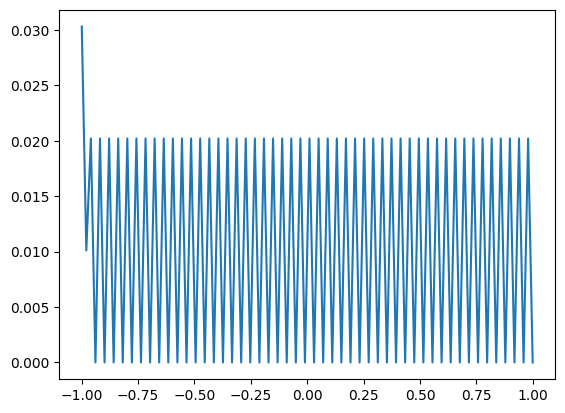

In [336]:
x_s = np.linspace(-1, 1, 100) #sample points
wk = get_wk(x_s, -1, 1)
plt.plot(x_s, wk)